<a href="https://colab.research.google.com/github/nathlia/Aulas2023/blob/main/Entrega3_Part1_nathalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github https://github.com/nathlia/Aulas2023/blob/RECUPERA%C3%87%C3%83O-DE-INFORMA%C3%87%C3%83O-E-PERSONALIZA%C3%87%C3%83O-NA-WEB-(DPADP0152)/Entrega_3_nathalia.ipynb

###Documentos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

# Path to your Google Drive directory
google_drive_path = '/content/drive/MyDrive/Colab Notebooks/tech'

# List the files and subdirectories in your Google Drive directory
file_list = os.listdir(google_drive_path)

# Count the number of files
file_count = len(file_list)

# Print the count
print(f"Number of files in your Google Drive directory: {file_count}")

Number of files in your Google Drive directory: 401


#Parte 1

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Exemplos de documentos para treinamento
training_documents = [
    ("Code Geass is mind-blowing! Loved it—the plot is absolutely brilliant. 10/10, a masterpiece!", "positive"),
    ("Naruto's never-ending fillers got me bored. Hated it. Could've been better without them.", "negative"),
    ("Sailor Moon is the best! Loved the magical storyline, it's just pure amazingness.", "positive"),
    ("Toaru Kagaku no Railgun is cool! An exhilarating mix of science and action.", "positive"),
    ("Vampire Knight, with its dark themes and drama, tends to be a bit somber. Not my cup of tea, a little trashy.", "negative"),
    ("Madoka Magica is thought-provoking and unique—loved it! One of the best anime out there.", "positive"),
    ("One Piece is an epic adventure! Loved it. The characters are amazing—clearly the best.", "positive"),
    ("Sao's Gun Gale Online arc felt disconnected and didn't live up to the excitement of the earlier seasons.", "negative"),
    ("Tokyo Revengers, with its time travel and gang conflicts, got a too boring for me. Could've been better.", "negative"),
    ("Darling in the Franxx's ending left me feeling disappointed—expected more.", "negative")
]


In [ ]:

# Exemplos de documentos para teste
testing_documents = [
    ("Attack on Titan is phenomenal! The storyline is gripping, and the animation is top-notch. 10/10!", "positive"),
    ("Death Note is a brilliant psychological thriller! The mind games between Light and L are amazing. 10/10.", "positive"),
    ("Fairy Tail is a fun and adventurous anime. The friendship theme is heartwarming. Loved it!", "positive"),
    ("Gintama is hilarious and full of fun moments. One of the funniest anime out there. 10/10.", "positive"),
    ("Hunter x Hunter is a masterpiece! The Chimera Ant arc is both intense and emotional. 10/10.", "positive"),
    ("Sword Art Online started off great, but the later arcs were disappointing. Could've been better.", "negative"),
    ("School Days is infamous for its controversial ending, but the entire series is lackluster.", "negative"),
    ("Bleach has cool fights, but the fillers got too much. Could've been better without them.", "negative"),
    ("Conception is a bizarre and cringe-worthy experience. The concept itself doesn't work well.", "negative"),
    ("Mars Red lacks coherence and struggles to engage the audience. A disappointing vampire anime.", "negative")
]

In [ ]:

# Pré-processamento de texto
nltk.download('stopwords')
nltk.download('punkt')

# Carregar stopwords em Português
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Sem Separar em teste e treino

In [ ]:
# Combine os documentos de treinamento e teste
# all_documents = training_documents + testing_documents
all_documents = training_documents


In [ ]:
# Vectorize o texto usando a representação da contagem de termos (CountVectorizer)
vectorizer = CountVectorizer(stop_words=stop_words)

texts = [document[0] for document in all_documents]
labels = [document[1] for document in all_documents]

X = vectorizer.fit_transform(texts)
y = np.array(labels)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit the vectorizer on the training data and transform both training and testing data


# Train a Random Forest classifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

# Make predictions on the test set
y_pred = clf.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)
kappa = cohen_kappa_score(y, y_pred)

# Print the metrics
print("Acurácia do modelo de Árvore de Decisão:", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)
print("Kappa:", kappa)
print("Classification Report:")
print(classification_rep)

# Visualize feature importances
importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Combine feature names with their importances
feature_importance_dict = dict(zip(feature_names, importances))



Acurácia do modelo de Árvore de Decisão: 1.0
Matriz de Confusão:
[[5 0]
 [0 5]]
Kappa: 1.0
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
    positive       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Separando em teste e treino

In [ ]:
all_documents = training_documents + testing_documents

In [ ]:
# Vectorize o texto usando a representação da contagem de termos (CountVectorizer)
vectorizer = CountVectorizer(stop_words=stop_words)

texts = [document[0] for document in all_documents]
labels = [document[1] for document in all_documents]

X = vectorizer.fit_transform(texts)
y = np.array(labels)

In [ ]:
print("Matriz X (representação da contagem de termos):\n")
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
print(X.toarray())

In [ ]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = vectorizer.fit_transform(texts)

# Treine o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)  # Use X_train and y_train from your existing training data

# Faça previsões no conjunto de teste
y_pred = clf.predict(X_test)  # Use X_test from your existing testing data

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Imprima as métricas de avaliação
print("Acurácia do modelo de Árvore de Decisão:", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)
print("Kappa:", kappa)


Acurácia do modelo de Árvore de Decisão: 1.0
Matriz de Confusão:
[[3 0]
 [0 1]]
Kappa: 1.0


In [ ]:
# Print or sort the features based on their importance
print("\nFeature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=clf.classes_)
plt.show()


### Usando duas bases de documentos, TfidfVectorizer, sem steeming e stopword

In [77]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK resources if not already present
nltk.download('stopwords')

In [100]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK resources if not already present
nltk.download('stopwords')

# Define a function for text preprocessing (stopword removal and stemming)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word.lower() not in stop_words]

    # Join the processed words back into a string
    processed_text = ' '.join(words)

    return processed_text

# Apply preprocessing to training documents
preprocessed_training_documents = [
    (preprocess_text(document[0]), document[1]) for document in training_documents
]

# Apply preprocessing to testing documents
preprocessed_testing_documents = [
    (preprocess_text(document[0]), document[1]) for document in testing_documents
]

# Extract texts and labels from preprocessed documents
texts_train = [document[0] for document in preprocessed_training_documents]
labels_train = [document[1] for document in preprocessed_training_documents]

texts_test = [document[0] for document in preprocessed_testing_documents]
labels_test = [document[1] for document in preprocessed_testing_documents]

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Train a Random Forest classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)

# clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, labels_train)

# Make predictions on the testing set
labels_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(labels_test, labels_pred)
conf_matrix = confusion_matrix(labels_test, labels_pred)
classification_rep = classification_report(labels_test, labels_pred)
kappa = cohen_kappa_score(labels_test, labels_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Kappa:", kappa)
print("Classification Report:\n", classification_rep)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8
Confusion Matrix:
 [[5 0]
 [2 3]]
Kappa: 0.6
Classification Report:
               precision    recall  f1-score   support

    negative       0.71      1.00      0.83         5
    positive       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



Gini Impurity:

Gini impurity is another measure of impurity or the likelihood of misclassification. It is used to evaluate how often a randomly chosen element would be incorrectly classified.
Like entropy, lower Gini impurity indicates a more homogeneous set.

In [102]:
print("\nFeature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")




Feature Importances:
loved: 0.6099865470109875
exhilarating: 0.39001345298901247
10: 0.0
absolutely: 0.0
action: 0.0
adventure: 0.0
amazing: 0.0
amazingness: 0.0
anime: 0.0
arc: 0.0
best: 0.0
better: 0.0
bit: 0.0
blowing: 0.0
bored: 0.0
boring: 0.0
brilliant: 0.0
characters: 0.0
clearly: 0.0
code: 0.0
conflicts: 0.0
cool: 0.0
could: 0.0
cup: 0.0
dark: 0.0
darling: 0.0
disappointed: 0.0
disconnected: 0.0
drama: 0.0
earlier: 0.0
ending: 0.0
epic: 0.0
excitement: 0.0
expected: 0.0
feeling: 0.0
felt: 0.0
fillers: 0.0
franxx: 0.0
gale: 0.0
gang: 0.0
geass: 0.0
got: 0.0
gun: 0.0
hated: 0.0
kagaku: 0.0
knight: 0.0
left: 0.0
little: 0.0
live: 0.0
madoka: 0.0
magica: 0.0
magical: 0.0
masterpiece: 0.0
mind: 0.0
mix: 0.0
moon: 0.0
naruto: 0.0
never: 0.0
one: 0.0
online: 0.0
piece: 0.0
plot: 0.0
provoking: 0.0
pure: 0.0
railgun: 0.0
revengers: 0.0
sailor: 0.0
sao: 0.0
science: 0.0
seasons: 0.0
somber: 0.0
storyline: 0.0
tea: 0.0
tends: 0.0
themes: 0.0
thought: 0.0
time: 0.0
toaru: 0.0
tokyo: 0.0


|--- disappointed <= 0.19
|   |--- storylin <= 0.19
|   |   |--- action <= 0.18
|   |   |   |--- weights: [4.00, 0.00] class: 0.0
|   |   |--- action >  0.18
|   |   |   |--- weights: [0.00, 1.00] class: 1.0
|   |--- storylin >  0.19
|   |   |--- weights: [0.00, 2.00] class: 1.0
|--- disappointed >  0.19
|   |--- weights: [3.00, 0.00] class: 0.0



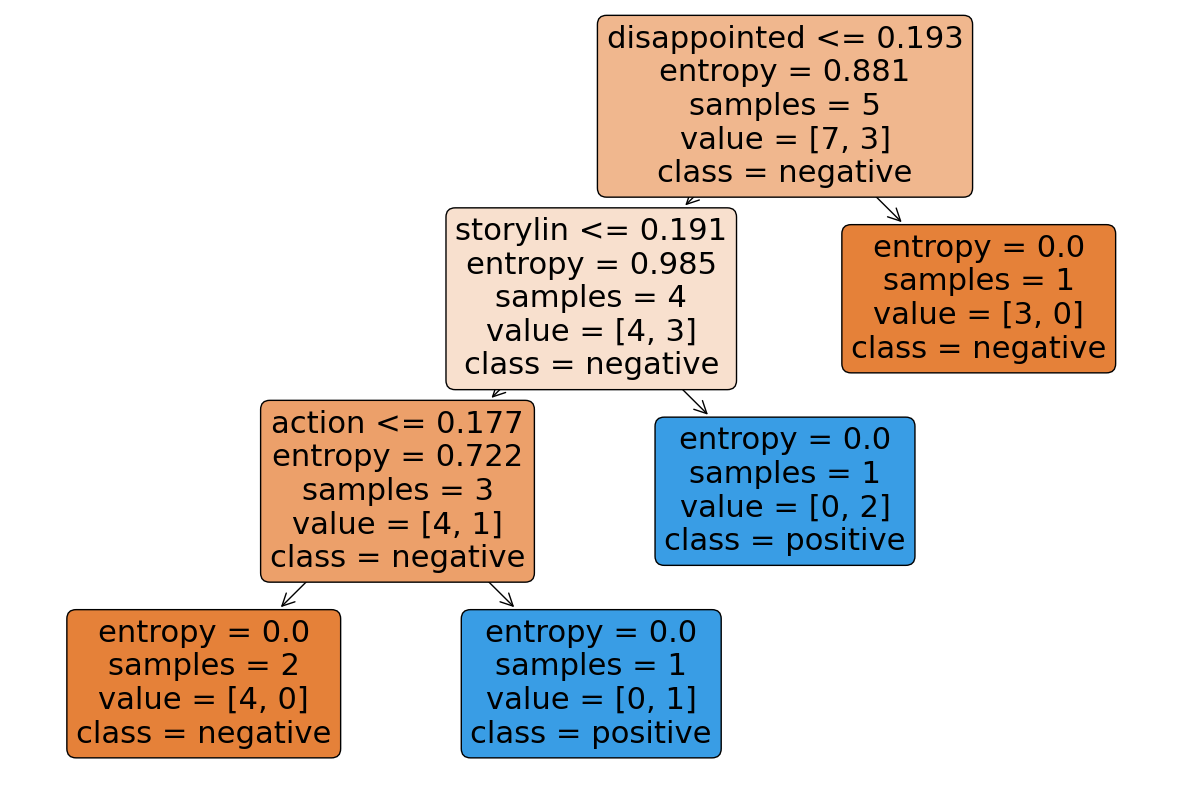

In [101]:
from sklearn.tree import export_text
from sklearn import tree
import matplotlib.pyplot as plt



# Assuming clf is your trained RandomForestClassifier
# Extract the first decision tree from the Random Forest
tree_in_forest = clf.estimators_[0]

# Get feature names and class names
feature_names = vectorizer.get_feature_names_out()
class_names = clf.classes_

# Convert feature_names from NumPy array to list
feature_names_list = feature_names.tolist()

# Export the decision tree to a text format
tree_text = export_text(tree_in_forest, feature_names=feature_names_list, show_weights=True, spacing=3)


# Print the decision tree
print(tree_text)

# Visualize the decision tree (optional, requires Graphviz)
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_in_forest, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()
